In [1]:
import numpy as np  # Lineer algebra uchun NumPy kutubxonasi
import pandas as pd  # Ma'lumotlarni qayta ishlash va CSV fayllar bilan ishlash
import matplotlib.pyplot as plt  # Ma'lumotlarni vizualizatsiya qilish uchun Matplotlib
import seaborn as sns  # Statistik ma'lumotlarni vizualizatsiya qilish uchun Seaborn

from sklearn.ensemble import RandomForestRegressor  # Random Forest modeli (Regression uchun)
from sklearn.svm import SVC  # Support Vector Classifier (SVC) algoritmi
from xgboost import XGBClassifier  # XGBoost algoritmi (klassifikatsiya uchun)
from sklearn.model_selection import GridSearchCV  # Giperparametrlarni qidirish uchun GridSearchCV

from sklearn.model_selection import train_test_split  # Ma'lumotlarni o'rgatish va test uchun bo'lish
from sklearn.preprocessing import MinMaxScaler  # Ma'lumotlarni o'lchovlar orasida normallashtirish uchun

from sklearn.pipeline import Pipeline  # Ma'lumotlarni ishlashning qulay yo'li
from sklearn import metrics  # Model natijalarini baholash uchun

from sklearn.linear_model import LogisticRegression  # Logistik regressiya modeli
from sklearn.tree import DecisionTreeClassifier, plot_tree  # plot_tree va uning grafikasi

from sklearn.metrics import mean_absolute_error, mean_squared_error  # Modelni baholash uchun xatolik o'lchovlari

from sklearn.preprocessing import StandardScaler
# Kaggle muhitidagi kirish katalogini o'qish
import os
for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [2]:
# Ma'lumotlarni CSV fayldan o'qiymiz
df_train = pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv', index_col=0)
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,2,...,4,4,1,4,4,4,3,21,12.0,0
9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,3,...,4,4,4,4,3,4,3,37,38.0,1


In [3]:
# DataFrame dagi sonli ustunlar uchun asosiy statistik ma'lumotlarni chiqaramiz
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [4]:
# Ustunlar va qatorlar o'rnini alishtiramiz. Bu bir qancha qulayliklar beradi
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,39.375100,14.897959,7.0,27.0,40.0,51.00,80.0
Flight Distance,10000.0,1229.556200,1022.281958,31.0,421.0,863.5,1806.75,4983.0
Inflight wifi service,10000.0,2.780200,1.362745,0.0,2.0,3.0,4.00,5.0
Departure/Arrival time convenient,10000.0,3.065100,1.527316,0.0,2.0,3.0,4.00,5.0
Ease of Online booking,10000.0,2.797800,1.421168,0.0,2.0,3.0,4.00,5.0
Gate location,10000.0,2.981000,1.283278,1.0,2.0,3.0,4.00,5.0
Food and drink,10000.0,3.214500,1.333217,0.0,2.0,3.0,4.00,5.0
Online boarding,10000.0,3.349100,1.352779,0.0,2.0,4.0,4.00,5.0
Seat comfort,10000.0,3.491400,1.311220,0.0,3.0,4.0,5.00,5.0
Inflight entertainment,10000.0,3.402900,1.331822,0.0,2.0,4.0,5.00,5.0


In [5]:
df_train.isna().sum()  #Har bir ustun uchun bo'sh (NaN) qiymatlarning umumiy sonini ko'rsatamiz

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [6]:
df_train.fillna(12, inplace=True)
# Ushbu kodni qo'llaganimizdan so'ng, `Arrival Delay in Minutes` ustunidagi 28 ta NaN qiymat 12 bilan to'ldiriladi. Qolgan ustunlarda NaN mavjud emasligi sababli, ular o'zgarmaydi.

In [7]:
# yana bir ishonch hosil qilib ko'ramiz
df_train.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [8]:
# DataFrame dagi birinchi beshta qatorni chiqaramiz
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [9]:
# DataFrame haqida umumiy ma'lumot olamiz
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


☝️☝️☝️
*****
* DataFrame da jami 10,000 ta qator mavjud, indekslari 1 dan 10,000 gacha.
* Jami 23 ta ustun mavjud.
  
* Har bir ustun bo'yicha:
1. Column: Ustun nomi.
1. Non-Null Count: Har bir ustundagi null bo'lmagan (to'ldirilgan) qiymatlar soni.
1. Dtype: Har bir ustunning ma'lumot turi (int64, float64, yoki object).
* Ma'lumot turi bo'yicha:
  1. object: Matnli ma'lumotlar.
  2. int64: Butun sonlar.
  3. float64: O'nlik sonlar.
* Misol uchun:
  1. Gender: 10000 ta qiymat, turi object (matnli ma'lumot).
  2. Age: 10000 ta qiymat, turi int64 (butun son).
  3. Arrival Delay in Minutes: 10000 ta qiymat, turi float64 (o'nlik son).
*****
turi float64 (o'nlik son).


In [10]:
# Har bir "satisfaction" qiymatining foiz nisbati hisoblaymiz
sf_baho = df_train['satisfaction'].value_counts() / len(df_train) * 100
sf_baho

satisfaction
0    50.0
1    50.0
Name: count, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


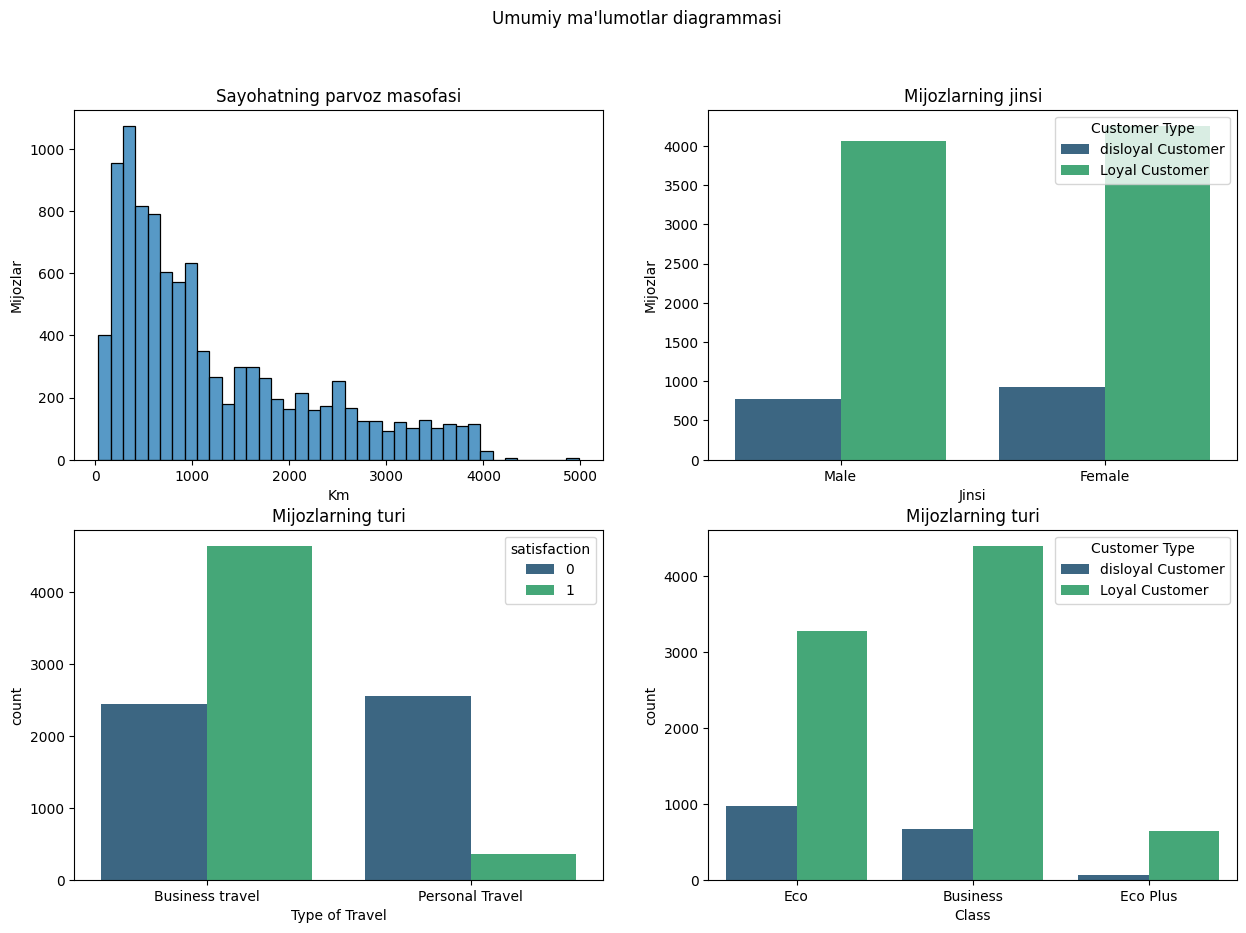

In [11]:
# Grafiklar paneli yaratamiz: 2 qator, 2 ustundan iborat (jami 4 chizma)
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Umumiy chizma sarlavhasini qo'shamiz
fig.suptitle("Umumiy ma'lumotlar diagrammasi")

# 1-grafik: Parvoz masofasi taqsimoti
sns.histplot(x="Flight Distance", data=df_train, ax=ax[0,0])  # Histogram
ax[0,0].set_title("Sayohatning parvoz masofasi")  # Chizma sarlavhasi
ax[0, 0].set_ylabel("Mijozlar")  # Y o'qi nomi
ax[0, 0].set_xlabel("Km")  # X o'qi nomi

# 2-grafik: Mijozlarning jinsi bo'yicha taqsimoti
sns.countplot(x='Gender', hue='Customer Type', palette='viridis', data=df_train, ax=ax[0,1])
ax[0,1].set_title("Mijozlarning jinsi")  # Chizma sarlavhasi
ax[0, 1].set_ylabel("Mijozlar")  # Y o'qi nomi
ax[0, 1].set_xlabel("Jinsi")  # X o'qi nomi

# 3-grafik: Sayohat turi bo'yicha qoniqish darajasi
sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=df_train, ax=ax[1,0])
ax[1,0].set_title("Mijozlarning turi")  # Chizma sarlavhasi

# 4-grafik: Mijozlar sinfi va turi bo'yicha taqsimot
sns.countplot(x='Class', hue='Customer Type', palette='viridis', data=df_train, ax=ax[1,1])
ax[1,1].set_title("Mijozlarning turi")  # Chizma sarlavhasi

# Diagrammalarni ko'rsatish
plt.show()

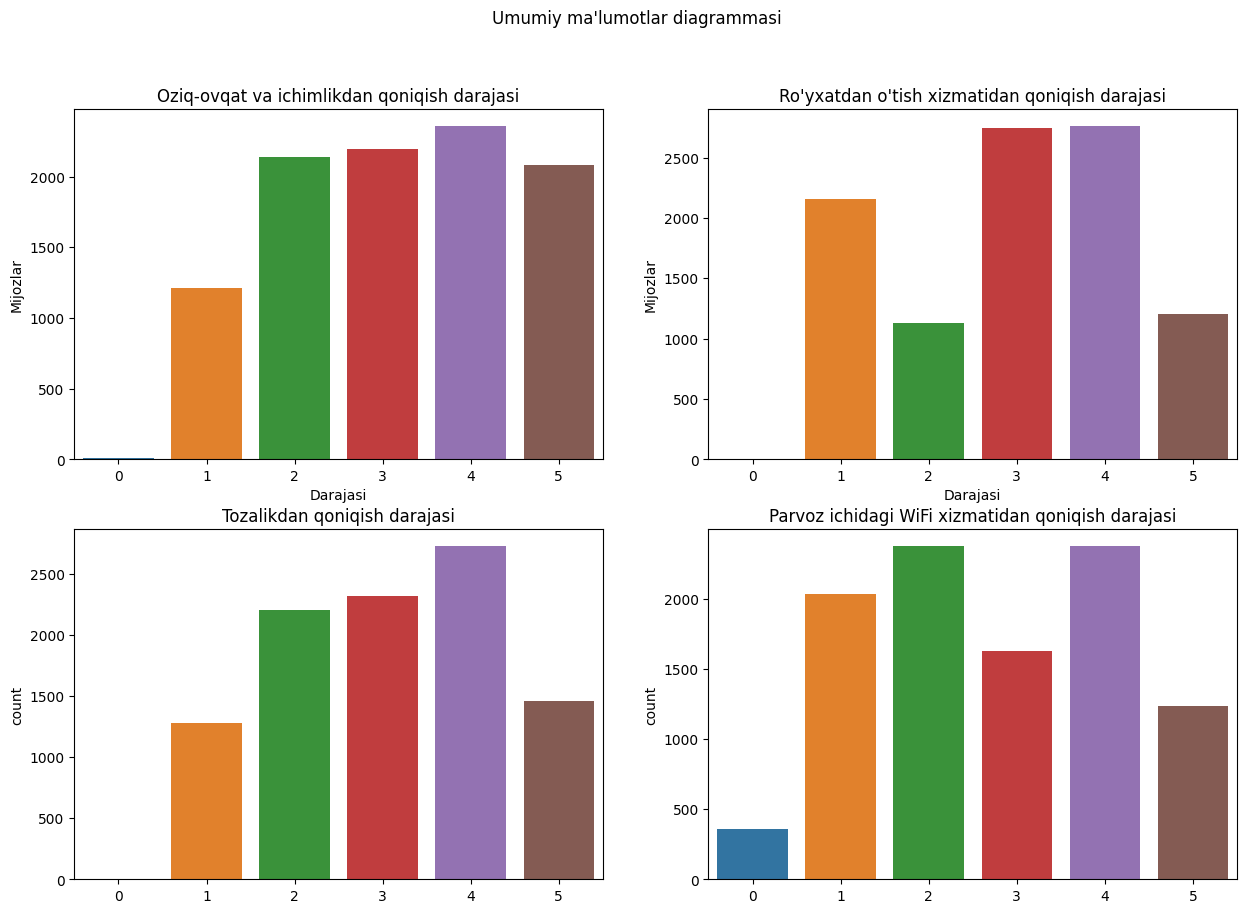

In [12]:
# Grafiklar paneli yaratamiz: 2 qator, 2 ustundan iborat (jami 4 chizma)
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Umumiy chizma uchun sarlavha qo'shamiz
fig.suptitle("Umumiy ma'lumotlar diagrammasi")

# 1-grafik: Oziq-ovqat va ichimlikdan qoniqish darajasi
sns.barplot(ax=ax[0, 0], x=df_train['Food and drink'].unique(), y=df_train['Food and drink'].value_counts())
ax[0, 0].set_title("Oziq-ovqat va ichimlikdan qoniqish darajasi")  # Chizma sarlavhasi
ax[0, 0].set_ylabel("Mijozlar")  # Y o'qi nomi
ax[0, 0].set_xlabel("Darajasi")  # X o'qi nomi

# 2-grafik: Ro'yxatdan o'tish xizmatidan qoniqish darajasi
sns.barplot(ax=ax[0, 1], x=df_train['Checkin service'].unique(), y=df_train['Checkin service'].value_counts())
ax[0, 1].set_title("Ro'yxatdan o'tish xizmatidan qoniqish darajasi")  # Chizma sarlavhasi
ax[0, 1].set_ylabel("Mijozlar")  # Y o'qi nomi
ax[0, 1].set_xlabel("Darajasi")  # X o'qi nomi

# 3-grafik: Tozalikdan qoniqish darajasi
sns.barplot(ax=ax[1, 0], x=df_train['Cleanliness'].unique(), y=df_train['Cleanliness'].value_counts())
ax[1, 0].set_title("Tozalikdan qoniqish darajasi")  # Chizma sarlavhasi

# 4-grafik: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi
sns.barplot(ax=ax[1, 1], x=df_train['Inflight wifi service'].unique(), y=df_train['Inflight wifi service'].value_counts())
ax[1, 1].set_title("Parvoz ichidagi WiFi xizmatidan qoniqish darajasi")  # Chizma sarlavhasi

# Diagrammalarni ko'rsatish
plt.show()

In [13]:
# "satisfaction" ustuni bilan har bir ustunning korrelyatsiyasini hisoblab, eng yuqori qiymatni tartiblaymiz
# Faqat raqamli ustunlarni tanlash
raqamli_ustun = df_train.select_dtypes(include=['int64', 'float64'])

# "satisfaction" ustuni bilan raqamli ustunlarning korrelyatsiyasini hisoblaymiz
corr = raqamli_ustun.corrwith(df_train['satisfaction']).abs().sort_values(ascending=False)

# Natijani ko'rsatish
corr

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048581
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

In [14]:
# df_train dagi mavjud bo'lmagan qiymatlar sonini chiqaramiz
print(f"Mavjud bo'lmagan qiymatlar soni: {df_train.isnull().sum().sum()}")

# Mavjud bo'lmagan qatorlar sonini hisoblaymiz
qatorlar = df_train[df_train.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {qatorlar}")

# Mavjud bo'lmagan qatorlarning umumiy ma'lumotlarga nisbati
print(f"Mavjud bo'lmagan qatorlar (foizda): {np.round(qatorlar/len(df_train)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 0
Mavjud bo'lmagan qatorlar soni: 0
Mavjud bo'lmagan qatorlar (foizda): 0.0%


In [15]:
# Matnli ustunlarni raqamli shaklga o'tkazish
raqamlangan = pd.get_dummies(df_train)

# Natijani ko'rsatish
raqamlangan.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,33,571,2,3,2,4,4,2,4,4,...,0,False,True,False,True,True,False,False,True,False
2,49,1431,4,1,4,4,3,5,4,5,...,1,True,False,True,False,True,False,True,False,False
3,43,867,1,4,4,4,4,4,3,1,...,0,True,False,True,False,True,False,False,True,False
4,27,1550,3,3,3,3,2,2,2,2,...,1,True,False,True,False,True,False,True,False,False
5,11,526,3,4,3,2,4,3,4,4,...,0,False,True,True,False,False,True,False,True,False


In [16]:
# "satisfaction" ustunini ajratib, X (features) va y (target) o'zgaruvchilarini yaratamiz
X = raqamlangan.drop("satisfaction", axis=1)  # "satisfaction" ustunini X dan olib tashlaymiz
y = raqamlangan['satisfaction']  # "satisfaction" ustunini y o'zgaruvchisiga saqlaymiz

In [17]:
# X o'zgaruvchilarini standartlashtiramiz
scr = StandardScaler()  # Standartlashtirish uchun obyekt yaratamiz
X = scr.fit_transform(X)  # X ustunlarini standartlashtiramiz

# Ma'lumotlarni o'quv va test to'plamlariga bo'lamiz
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

In [18]:
# Modellarni yaratamiz
LR_m = LogisticRegression()  # Logistik regressiya modeli
SVC_m = SVC()  # Support Vector Classifier (SVC) modeli
Tree_m = DecisionTreeClassifier()  # Decision Tree modeli
XGB_m = XGBClassifier()  # XGBoost modeli

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.87      0.85      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Model aniqligi: 0.8655


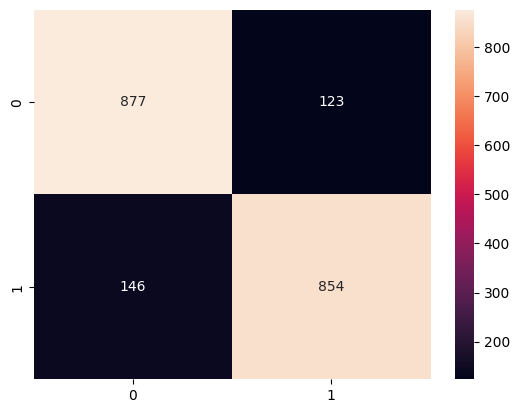

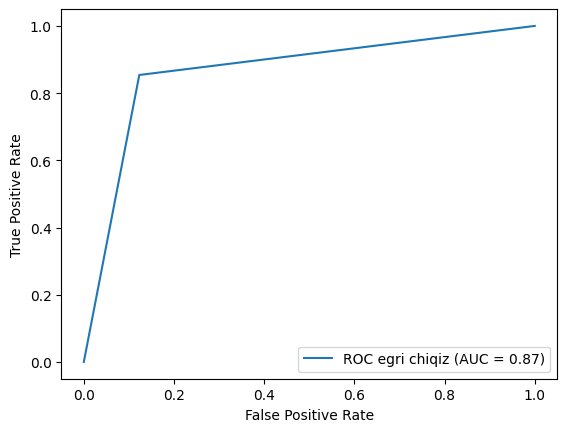

In [19]:
LR_m = LogisticRegression()  # Logistik regressiya modeli yaratamiz
LR_m.fit(X_train, y_train)  # Modelni o'quv ma'lumotlari bilan o'rgatamiz

y_prediction = LR_m.predict(X_test)  # Test to'plamidan foydalanib, modeldan prognoz olamiz
print(metrics.classification_report(y_test, y_prediction))  # Modelning aniqligi va boshqa baholash ko'rsatkichlarini chiqaramiz
print("Model aniqligi:", metrics.accuracy_score(y_test, y_prediction))  # Model aniqligini chiqaramiz

confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)  # Confusion matrix hisoblaymiz
sns.heatmap(confusion_matrix, annot=True, fmt="g")  # Matritsani heatmap shaklida chiqaramiz
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prediction)  # FPR (false positive rate) va TPR (true positive rate) ni hisoblaymiz
roc_auc = metrics.auc(fpr, tpr)  # ROC curve ning AUC (Area Under Curve) qiymatini hisoblaymiz
ekran = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC egri chiqiz')  # ROC curve ni vizualizatsiya qilamiz
ekran.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.93      0.93      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqliligi: 0.93


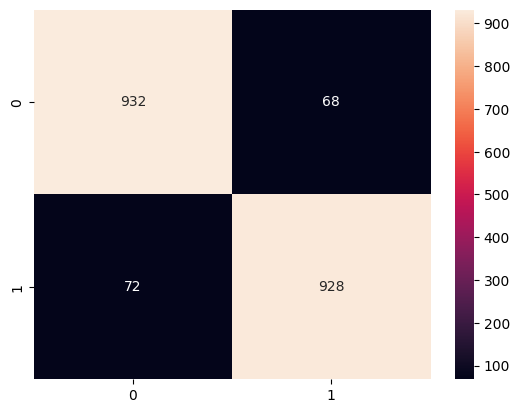

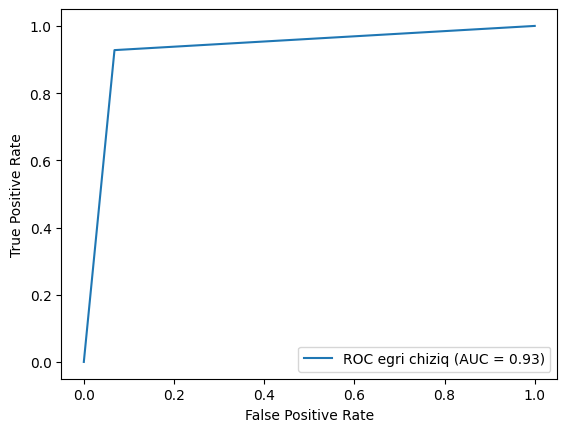

In [20]:
Tree_m.fit(X_train, y_train)  # Trening ma'lumotlari yordamida modelni o'qitamiz (fit).

y_prediction = Tree_m.predict(X_test)  # Test ma'lumotlariga asoslanib, modeldan bashorat (predict) olamz.
print(metrics.classification_report(y_test, y_prediction))  # Modelni aniqlik, recall, f1-score kabi ko'rsatkichlar bilan baholaymiz.
print("Model aniqliligi:", metrics.accuracy_score(y_test, y_prediction))  # Aniqlik ko'rsatkichini chiqaramiz.

confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)  # Confusion matrixni hisoblaymiz.
sns.heatmap(confusion_matrix, annot=True, fmt="g")  # Confusion matrixni issiqlik xaritasi (heatmap) shaklida ko'rsatamiz.
plt.show()  # Grafikni ko'rsatamiz.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prediction)  # ROC egri chizig'i uchun ma'lumotlarni olamiz (False Positive Rate va True Positive Rate).
roc_auc = metrics.auc(fpr, tpr)  # ROC egri chizig'ining ostidagi maydonni (AUC) hisoblaymiz.
ekran = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC egri chiziq')  # ROC egri chizig'ini chizish uchun obyekt yaratamiz.
ekran.plot()  # ROC egri chizig'ini chizamiz
plt.show()  # Grafikni ko'rsatamz.

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1000
           1       0.94      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqliligi: 0.9325


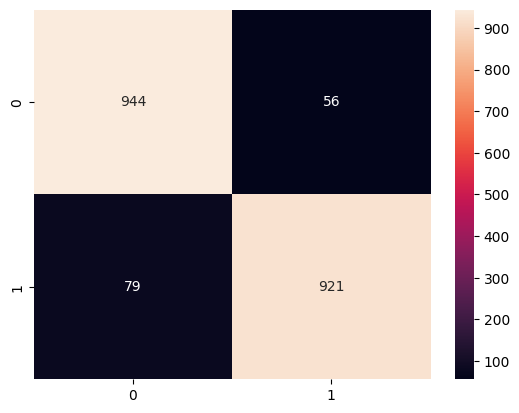

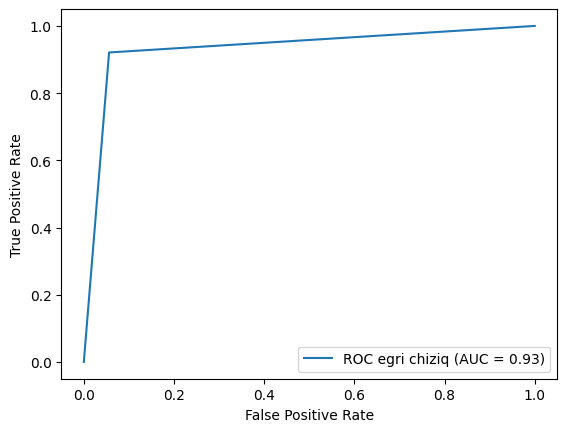

In [21]:
svm_m = SVC()  # SVM (Support Vector Machine) modeli obyektini yaratamiz.
svm_m.fit(X_train, y_train)  # Trening ma'lumotlari yordamida SVM modelini o'qitamiz (fit).

y_prediction = svm_m.predict(X_test)  # Test ma'lumotlariga asoslanib, modeldan bashorat (predict) olamiz.
print(metrics.classification_report(y_test, y_prediction))  # Modelni aniqlik, recall, f1-score kabi ko'rsatkichlar bilan baholaymz.
print("Model aniqliligi:", metrics.accuracy_score(y_test, y_prediction))  # Aniqlik ko'rsatkichini chiqaramiz.

confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)  # Confusion matrixni hisoblaymiz.
sns.heatmap(confusion_matrix, annot=True, fmt="g")  # Confusion matrixni issiqlik xaritasi (heatmap) shaklida ko'rsatamiz.
plt.show()  # Grafikni ko'rsatamiz.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prediction)  # ROC egri chizig'i uchun ma'lumotlarni olamiz (False Positive Rate va True Positive Rate).
roc_auc = metrics.auc(fpr, tpr)  # ROC egri chizig'ining ostidagi maydonni (AUC) hisoblaymiz.
ekran = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC egri chiziq')  # ROC egri chizig'ini chizish uchun obyekt yaratamiz.
ekran.plot()  # ROC egri chizig'ini chizamiz.
plt.show()  # Grafikni ko'rsatamiz.

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.96      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model aniqliligi: 0.95


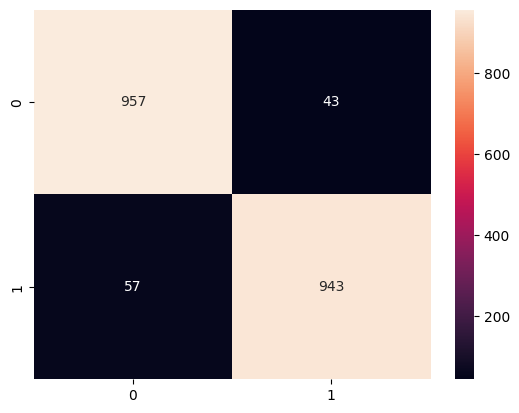

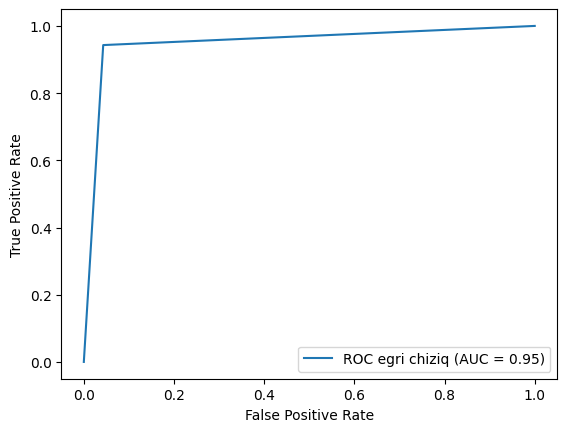

In [22]:
XGB_m.fit(X_train, y_train)  # Trening ma'lumotlari yordamida XGBoost modelini o'qitamiz (fit).

y_prediction = XGB_m.predict(X_test)  # Test ma'lumotlariga asoslanib, modeldan bashorat (predict) olamiz.
print(metrics.classification_report(y_test, y_prediction))  # Modelni aniqlik, recall, f1-score kabi ko'rsatkichlar bilan baholaymiz.
print("Model aniqliligi:", metrics.accuracy_score(y_test, y_prediction))  # Aniqlik ko'rsatkichini chiqaramiz.

confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)  # Confusion matrixni hisoblaymiz.
sns.heatmap(confusion_matrix, annot=True, fmt="g")  # Confusion matrixni issiqlik xaritasi (heatmap) shaklida ko'rsatamiz.
plt.show()  # Grafikni ko'rsatamiz.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prediction)  # ROC egri chizig'i uchun ma'lumotlarni olamiz (False Positive Rate va True Positive Rate).
roc_auc = metrics.auc(fpr, tpr)  # ROC egri chizig'ining ostidagi maydonni (AUC) hisoblaymiz.
ekran = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC egri chiziq')  # ROC egri chizig'ini chizish uchun obyekt yaratamiz.
ekran.plot()  # ROC egri chizig'ini chizamiz.
plt.show()  # Grafikni ko'rsatamiz.

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       0.94      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqliligi: 0.9415


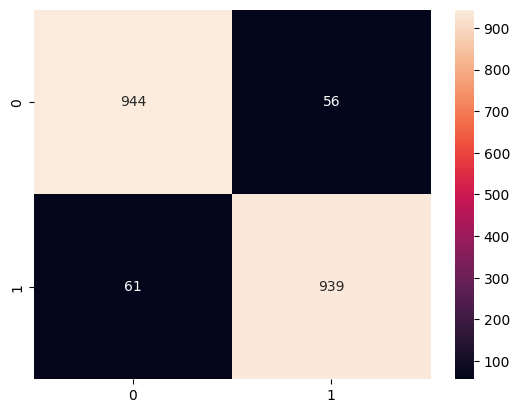

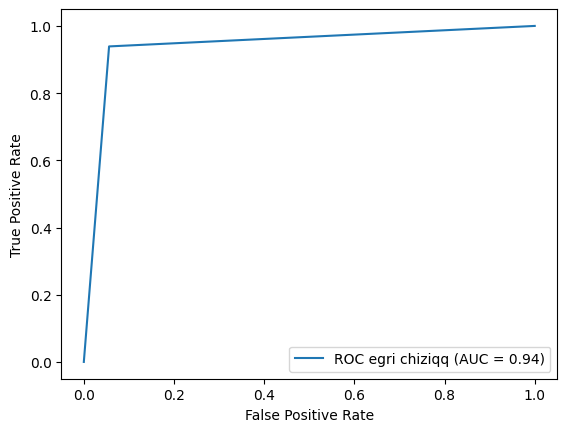

In [23]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest klassifikatori uchun kutubxona.
RF_m = RandomForestClassifier()  # Random Forest klassifikatsiya modelini yaratamiz.

RF_m.fit(X_train, y_train)  # Trening ma'lumotlari yordamida Random Forest modelini o'qitamz (fit).

y_prediction = RF_m.predict(X_test)  # Test ma'lumotlariga asoslanib, modeldan bashorat (predict) olamz.
print(metrics.classification_report(y_test, y_prediction))  # Modelni aniqlik, recall, f1-score kabi ko'rsatkichlar bilan baholaymiz.
print("Model aniqliligi:", metrics.accuracy_score(y_test, y_prediction))  # Aniqlik ko'rsatkichini chiqaramiz.

confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)  # Confusion matrixni hisoblaymiz.
sns.heatmap(confusion_matrix, annot=True, fmt="g")  # Confusion matrixni issiqlik xaritasi (heatmap) shaklida ko'rsatamiz.
plt.show()  # Grafikni ko'rsatamiz.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prediction)  # ROC egri chizig'i uchun ma'lumotlarni olamiz (False Positive Rate va True Positive Rate).
roc_auc = metrics.auc(fpr, tpr)  # ROC egri chizig'ining ostidagi maydonni (AUC) hisoblaymiz.
ekran = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC egri chiziqq')  # ROC egri chizig'ini chizish uchun obyekt yaratamiz.
ekran.plot()  # ROC egri chizig'ini chizamiz.
plt.show()  # Grafikni ko'rsatamiz.

In [24]:
# Hyperparameter uchun parameter_grid tayyorlaymiz
parameter_grid = {'n_estimators': np.arange(1, 100)}  # Random Forest uchun `n_estimators` parametri 1 dan 99 gacha bo'lgan qiymatlarni ko'rib chiqadi.

# GridSearchCV bilan hyperparameter tuning
rfc_gscv = GridSearchCV(RF_m, parameter_grid, cv=5)  # GridSearchCV obyekti yaratildi, 5 marta kross-valitatsiya ishlatiladi.

# Trening ma'lumotlari yordamida eng yaxshi parametrlarni aniqlaymiz
rfc_gscv.fit(X, y)  # GridSearchCV orqali `RF_m` ni barcha parametr kombinatsiyalari bilan o'qitamiz.

# Eng yaxshi parametrlarni ko'rsatish
print("Eng yaxshi parametrlar:", rfc_gscv.best_params_)  # Tanlangan `n_estimators` qiymati.
print("Eng yaxshi modelning aniqligi:", rfc_gscv.best_score_)  # Eng yaxshi modelning kross-valitatsiya aniqligi.

Eng yaxshi parametrlar: {'n_estimators': 98}
Eng yaxshi modelning aniqligi: 0.9517


In [25]:
# GridSearchCV natijalaridan test natijalarining ranklarini ko'rsatamiz
test_score = rfc_gscv.cv_results_['rank_test_score']  # Har bir parametr kombinatsiyasi uchun test natijalarining reytinglari.
print(test_score)  # Natijalarni ko'rsatamiz.

[99 98 97 96 94 95 93 92 91 90 87 89 86 88 75 72 82 82 79 74 79 85 66 72
 84 81 62 59 34 77 76 66 62 62 77 61 69 53 17 59 27 36 53 50 49 25 14 17
 71 11 44 36 27 30  5 44  2 42 53 57 50 36  4 25 62 34 44  9 17 44 70 14
 23 11 66 42  7 36 10 21 53 57 44 32 13  5 21 16 31 36 50 17 36 23  3 27
 32  1  7]


In [26]:
# Eng yaxshi kross-valitatsiya aniqligi
print("Eng yaxshi modelning kross-valitatsiya aniqligi:", rfc_gscv.best_score_)

Eng yaxshi modelning kross-valitatsiya aniqligi: 0.9517


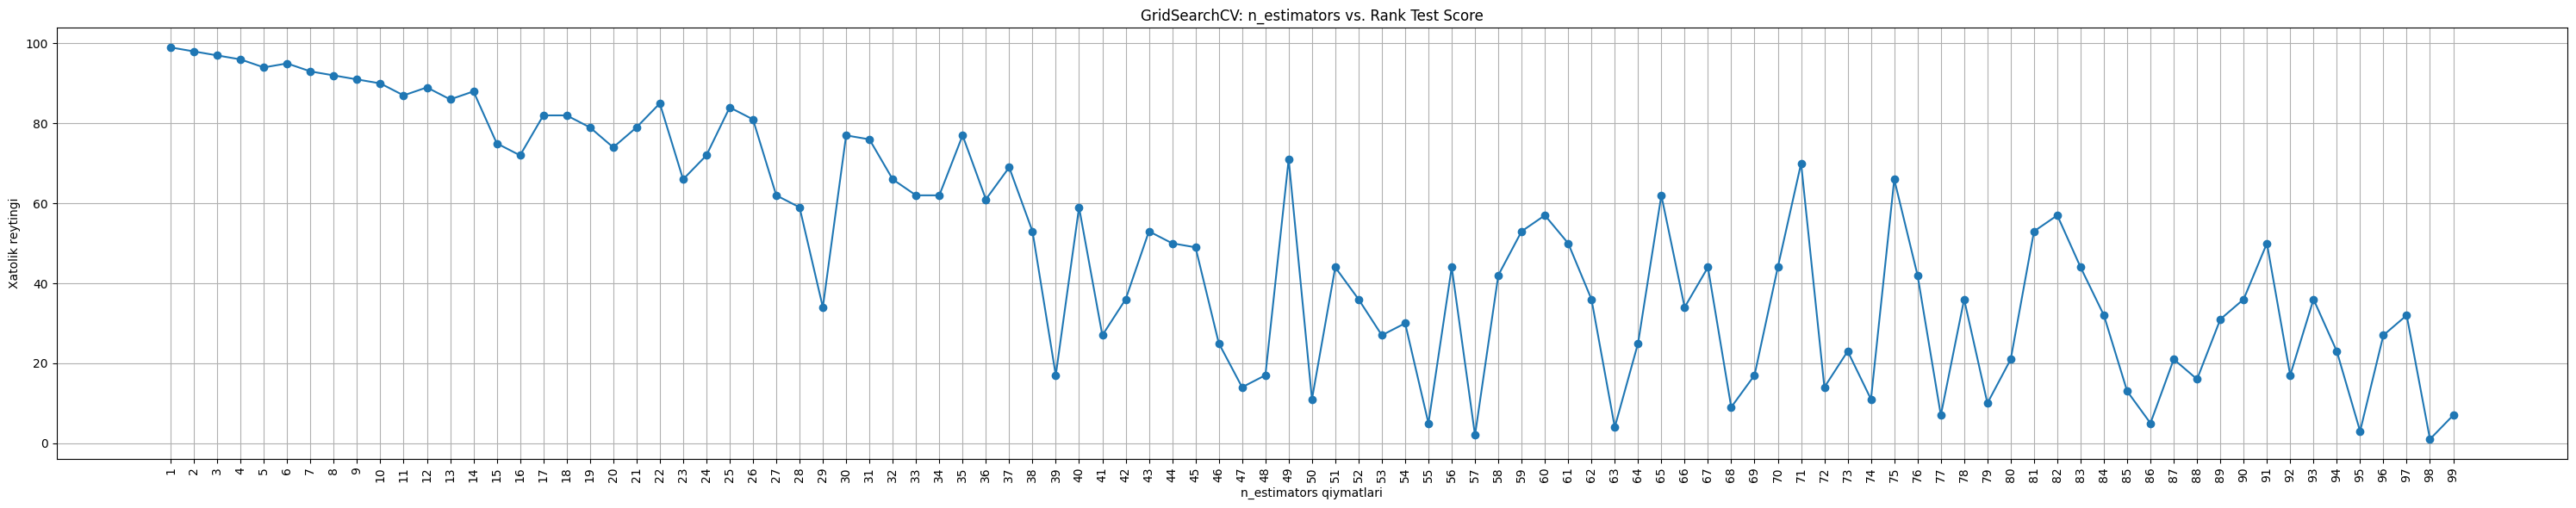

In [27]:
# Grafik o'lchamini sozlaymiz
plt.figure(figsize=(30, 6))

# Parametr va natija o'rtasidagi bog'liqlikni chizamiz
plt.plot(
    parameter_grid['n_estimators'],  # Parametr qiymatlari
    rfc_gscv.cv_results_['rank_test_score'],  # Reyting qiymatlari
    marker='o'  # Har bir nuqtani belgilash uchun marker
)

# O'qlarga nom beramiz va grafikani tuzatamiz
plt.xticks(parameter_grid['n_estimators'], rotation=90)  # X o'qidagi qiymatlarni aylantiramiz.
plt.xlabel("n_estimators qiymatlari")  # X o'qi uchun nom.
plt.ylabel("Xatolik reytingi")  # Y o'qi uchun nom.
plt.title("GridSearchCV: n_estimators vs. Rank Test Score")  # Grafik uchun sarlavha.
plt.grid(True)  # To'rni yoqamiz.
plt.tight_layout()  # Joylashuvni yaxshilaymiz.
plt.show()  # Grafikni ko'rsatamiz.

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1000
           1       0.95      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.9435


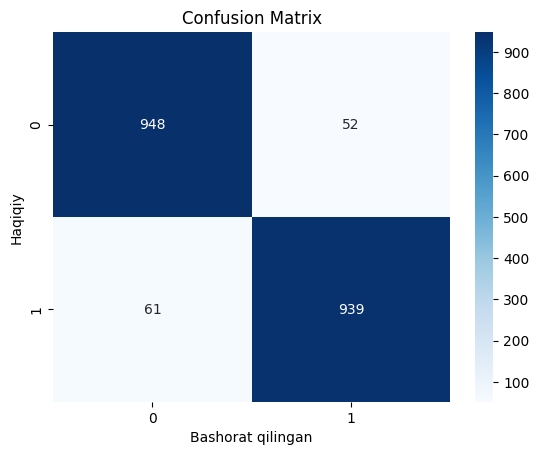

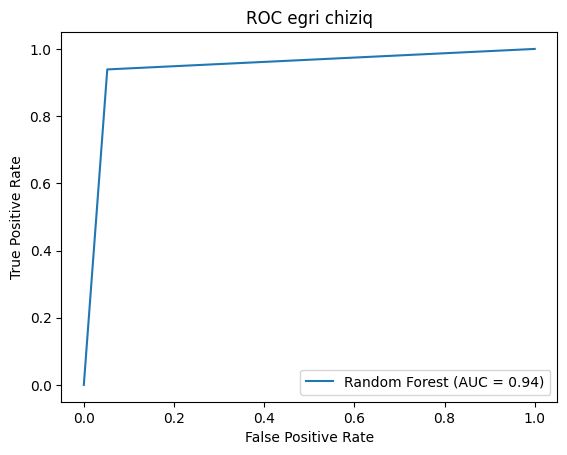

In [28]:
# Random Forest modelini yaratamiz va treningdan o'tkazamiz
rf_mod = RandomForestClassifier(n_estimators=90, random_state=42)  # `random_state` natijani qayta tiklash uchun.
rf_mod.fit(X_train, y_train)

y_prediction = rf_mod.predict(X_test)
print(metrics.classification_report(y_test, y_prediction))  # Klassifikatsiya hisobotini ko'rsatamiz.
print("Model aniqligi:", metrics.accuracy_score(y_test, y_prediction))  # Aniqlik foizini chiqaramiz.

confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)  # Confusion matrixni hisoblaymiz.
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues")  # Issiqlik xaritasi.
plt.title("Confusion Matrix")
plt.xlabel("Bashorat qilingan")
plt.ylabel("Haqiqiy")
plt.show()

# ROC egri chiziq
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prediction, pos_label=1)  # ROC parametrlari.
roc_auc = metrics.auc(fpr, tpr)  # AUC qiymatini hisoblaymiz.
ekran = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
ekran.plot()
plt.title("ROC egri chiziq")
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1000
           1       0.94      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.9325


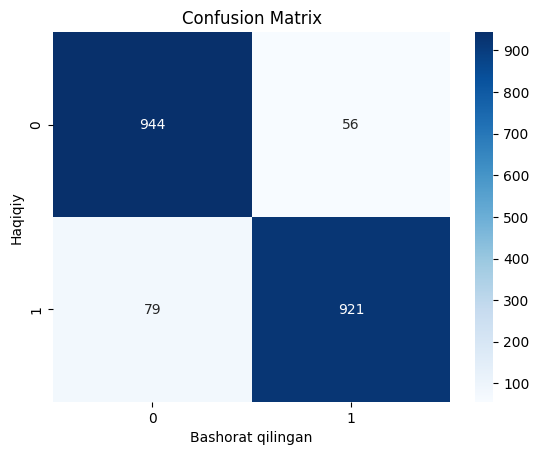

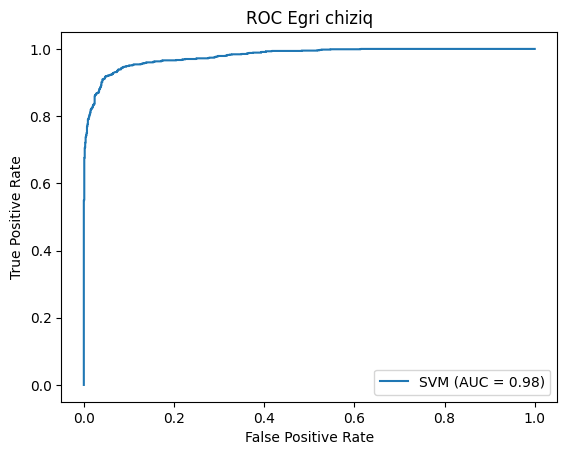

In [29]:
# SVM modelini yaratamiz va treningdan o'tkazamiz
SupportVM_m = SVC(probability=True, random_state=42)  # `probability=True` ROC egri chiziq uchun ehtimollarni olish kerak.
SupportVM_m.fit(X_train, y_train)

# Modelni baholaymiz
y_prediction = SupportVM_m.predict(X_test)  # Bashorat qilamiz.
print(metrics.classification_report(y_test, y_prediction))  # Klassifikatsiya hisobotini chiqaramiz.
print("Model aniqligi:", metrics.accuracy_score(y_test, y_prediction))  # Aniqlikni ko'rsatamiz.

confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)  # Confusion Matrixni hisoblaymiz.
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues")  # Vizualizatsiya.
plt.title("Confusion Matrix")
plt.xlabel("Bashorat qilingan")
plt.ylabel("Haqiqiy")
plt.show()

# ROC Egri chiziq
# Agar bu ikkilik tasniflash bo'lsa:
if len(set(y_test)) == 2:
    y_proba = SupportVM_m.predict_proba(X_test)[:, 1]  # Ijobiy klass uchun ehtimollar.
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)  # ROC parametrlari.
    roc_auc = metrics.auc(fpr, tpr)  # AUC qiymati.
    ekran = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM')
    ekran.plot()
    plt.title("ROC Egri chiziq")
    plt.show()
else:
    print("ROC Curve faqat ikkilik tasniflash uchun mos keladi.")

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1000
           1       0.94      0.93      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.9345


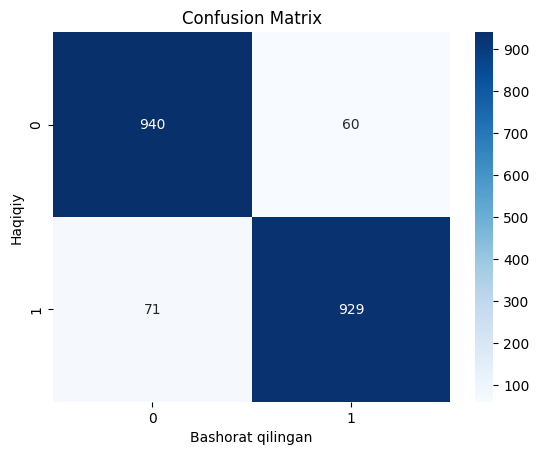

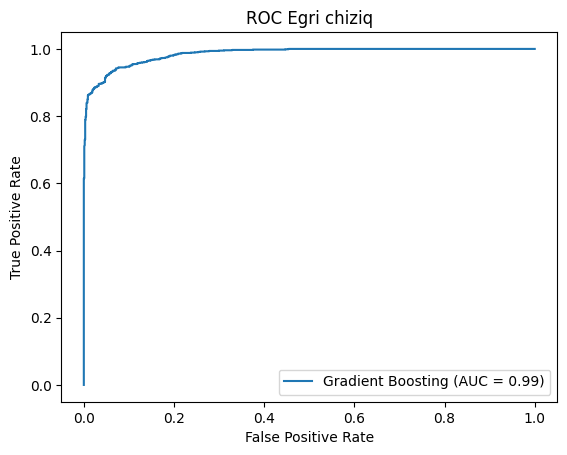

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict

# Gradient Boosting modelini yaratamiz
gmb_m = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 5-marta kross-valitatsiya orqali bashorat
gmb5 = cross_val_predict(gmb_m, X_train, y_train, cv=5)

# Test to'plamiga bashorat qilamiz
gmb_m.fit(X_train, y_train)
y_prediction = gmb_m.predict(X_test)

# Klassifikatsiya hisobotlari
print(metrics.classification_report(y_test, y_prediction))
print("Model aniqligi:", metrics.accuracy_score(y_test, y_prediction))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Bashorat qilingan")
plt.ylabel("Haqiqiy")
plt.show()

# ROC Egri chiziq
if len(set(y_test)) == 2:
    y_proba = gmb_m.predict_proba(X_test)[:, 1]  # Ijobiy klass uchun ehtimollar.
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
    roc_auc = metrics.auc(fpr, tpr)
    ekran = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Gradient Boosting')
    ekran.plot()
    plt.title("ROC Egri chiziq")
    plt.show()
else:
    print("ROC Curve faqat ikkilik tasniflash uchun qo'llaniladi.")

Accuracy: 0.947


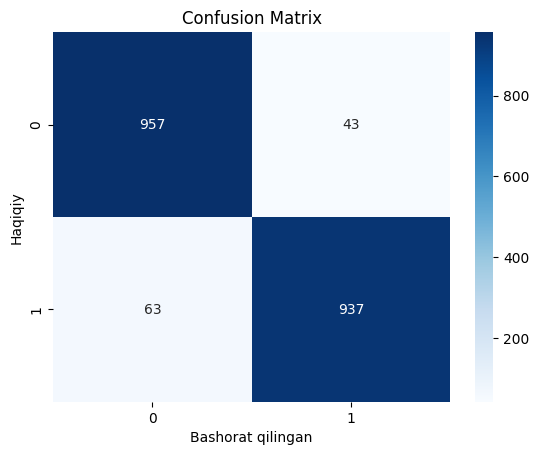

ROC AUC: 0.990946


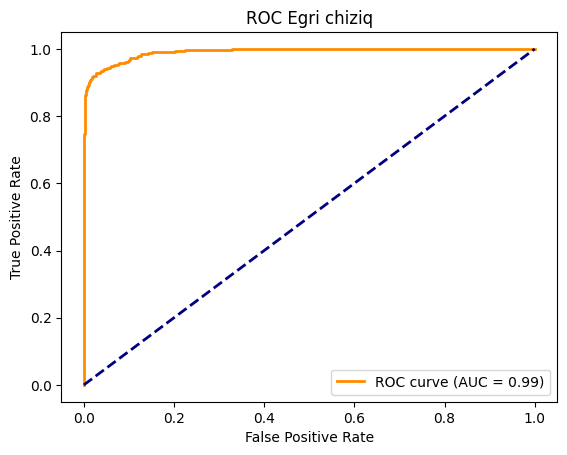

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import lightgbm as lgb
# Train va test datalarini umumlashtiramiz
data_train = lgb.Dataset(X_train, label=y_train)
data_test = lgb.Dataset(X_test, label=y_test)

# LightGBM parametrlarini sozlaymiz
parameters = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Modelni o'qitamiz
m = lgb.train(parameters, data_train, num_boost_round=100)

# Test ma'lumotlari uchun bashorat
y_pred_probability = m.predict(X_test)  # Bashorat ehtimollari
y_prediction = np.round(y_pred_probability) 

# Modelni baholaymiz
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_prediction)
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Bashorat qilingan")
plt.ylabel("Haqiqiy")
plt.show()

# ROC Egri chiziq
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)  # Ehtimollarni ROC egri chiziq uchun ishlatish
roc_auc = auc(fpr, tpr)  # AUC qiymatini hisoblash
print("ROC AUC:", roc_auc)

# ROC egri chizig'i
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Egri chiziq")
plt.legend(loc="lower right")
plt.show()

In [32]:
# Faylni yuklaymiz
yuklash = pd.read_csv("/kaggle/input/aviakompaniya/sample_submission.csv", index_col=0)

# Fayl tarkibini ko'rish
print(yuklash.head())

    satisfaction
id              
1              0
2              0
3              0
4              0
5              0


In [33]:
test_data = pd.read_csv("/kaggle/input/aviakompaniya/test_dataset.csv", index_col=0)
test_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Male,Loyal Customer,26,Business travel,Business,2949,3,3,4,3,...,4,4,1,4,2,3,1,4,29,36.0
3997,Female,Loyal Customer,23,Personal Travel,Eco,268,1,3,0,3,...,2,2,3,2,4,2,3,2,0,0.0
3998,Male,Loyal Customer,38,Business travel,Eco,602,2,1,1,1,...,2,2,1,1,2,2,3,2,23,45.0


In [34]:
test_data.fillna(0, inplace=True)

In [35]:
test_encoded = pd.get_dummies(test_data)
test_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,25,2704,2,2,2,3,2,3,5,2,...,191.0,True,False,True,False,False,True,False,True,False
2,49,1623,1,1,1,1,3,4,4,2,...,52.0,True,False,True,False,True,False,True,False,False
3,51,338,4,4,4,4,2,5,5,5,...,0.0,False,True,True,False,True,False,True,False,False
4,34,95,0,0,0,3,5,0,1,5,...,0.0,False,True,True,False,True,False,False,False,True
5,34,602,4,4,4,3,4,5,5,5,...,140.0,False,True,True,False,False,True,False,True,False


In [36]:
# `scaler` obyekti yordamida `test_encoded` ma'lumotlarini standartlashtiramiz yoki normalizatsiya qilamiz.
# `transform()` metodi o'qitilgan (fit qilingan) skalerni yangi ma'lumotlarga qo'llash uchun ishlatiladi.
XTNP = scr.transform(test_encoded)

# O'zgartirilgan test ma'lumotlarini ko'rsatish uchun:
print(XTNP)

[[-0.96495221  1.44237851 -0.57254957 ... -1.00964653  1.16292204
  -0.27456229]
 [ 0.64608723  0.38488743 -1.30639932 ...  0.99044564 -0.85990287
  -0.27456229]
 [ 0.78034051 -0.87216719  0.89514992 ...  0.99044564 -0.85990287
  -0.27456229]
 ...
 [-0.09230585 -0.6139085  -0.57254957 ... -1.00964653  1.16292204
  -0.27456229]
 [-1.09920549 -0.24608551  1.62899967 ... -1.00964653  1.16292204
  -0.27456229]
 [-0.96495221 -0.14043423  0.16130017 ... -1.00964653  1.16292204
  -0.27456229]]


In [37]:
# `XGB_m` modelidan foydalanib, tayyorlangan test ma'lumotlari uchun bashorat qilamiz.
prediction_to_sub = XGB_m.predict(XTNP)

In [38]:
# `yuklash` DataFrame'ining `satisfaction` ustunini model tomonidan bashorat qilingan qiymatlar bilan to'ldiramiz.
yuklash.satisfaction = prediction_to_sub
print(yuklash)

      satisfaction
id                
1                0
2                1
3                1
4                1
5                1
...            ...
3996             1
3997             0
3998             0
3999             1
4000             0

[4000 rows x 1 columns]


In [39]:
# Natijalarni CSV faylga saqlaymiz
yuklash.to_csv("yuklash.csv", index=False) 